# Plot the benchmarks

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../parallel/MPI_openMP/output/performance_benchmarks.csv')

Remember to add manually the data for serial part, one example is reported here:

- for MPI: $0.250000, Nan, Nan, NaN, 1, 1, 5.485337$
- for MPI + OpenMP: $0.250000, Nan, Nan, NaN, 1, 5.485337$

## Time

problem_size       0.25       0.50       1.00
processes                                    
1              5.485337  19.786097  54.822110
4             14.626333   7.291456  13.933156
8              1.988734   4.606200  11.512898
16             1.166704   2.790508   6.559193
24             1.093307   2.172315   5.661275


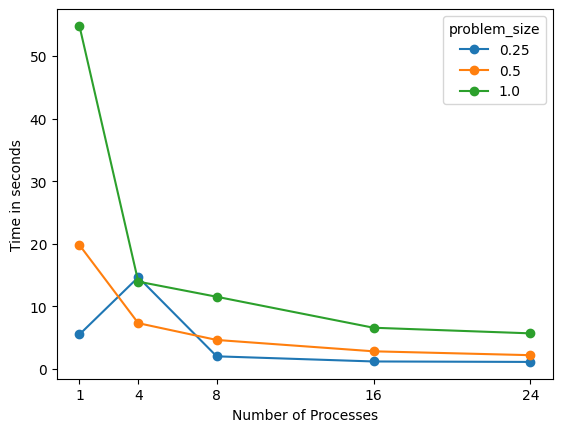

In [25]:

# Group the data by problem size and number of processes
grouped_data = data.groupby(['problem_size', 'processes'])

# Take the minimum time for each configuration
min_times = grouped_data['time'].min()

# Reshape the data for plotting
plot_data = min_times.unstack(level=0)
print(plot_data)

# Plot the data
plot_data.plot.line(marker='o')

# Set the x-tick locations and labels
plt.xticks(min_times.index.levels[1], min_times.index.levels[1])

# Add axis labels and a title
plt.xlabel('Number of Processes')
plt.ylabel('Time in seconds')
#plt.title('Time vs. Number of Processes for Different Problem Sizes')

# Show the plot
plt.show()


## Speedup

problem_size
0.25     5.485337
0.50    19.786097
1.00    54.822110
Name: time, dtype: float64
problem_size  processes
0.25          1             5.485337
              4             1.794298
              8             1.554635
              16            1.497075
              24            1.458633
              32            1.576714
              64            1.528036
              96            1.457933
              128           1.491831
0.50          1            19.786097
              4             6.182542
              8             3.421598
              16            3.110757
              24            3.000642
              32            3.007688
              64            2.949631
              96            2.887723
              128           2.901897
1.00          1            54.822110
              4            14.098894
              8             8.743154
              16            6.626509
              24            5.977541
              32            5.8

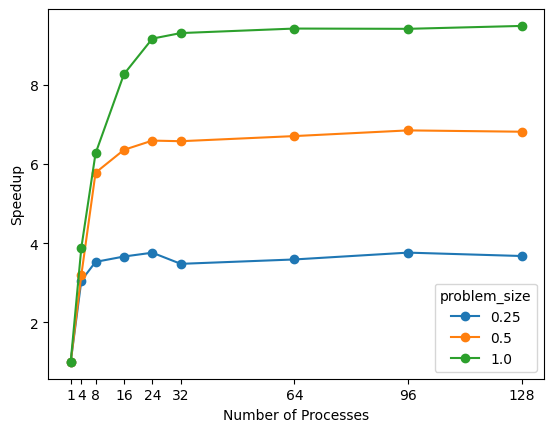

In [24]:
# Group the data by problem size and number of processes
grouped_data = data.groupby(['problem_size', 'processes'])

# Compute the minimum time for each configuration
min_times = grouped_data['time'].min()

# Compute the serial time for each problem size
serial_times = min_times.xs(1, level='processes')
print(serial_times)
print(min_times)
# Compute the speedup for each configuration
speedup = serial_times / min_times
print(speedup)

# Reshape the data for plotting
plot_data = speedup.unstack(level=0)

# Plot the data
plot_data.plot.line(marker='o')

# Set the x-tick locations and labels
plt.xticks(min_times.index.levels[1], min_times.index.levels[1])

# Add axis labels and a title
plt.xlabel('Number of Processes')
plt.ylabel('Speedup')
#plt.title('Speedup vs. Number of Processes for Different Problem Sizes')

# Show the plot
plt.show()

## Efficiency

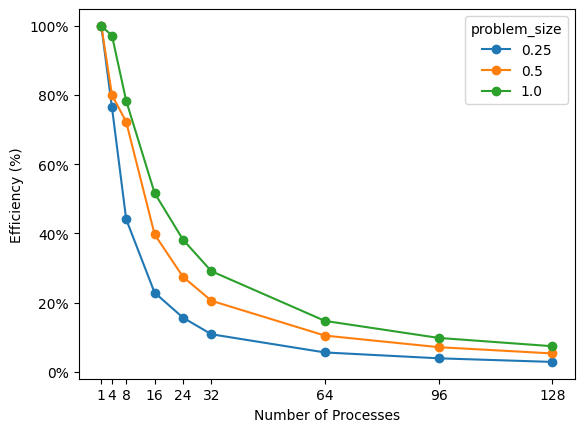

In [18]:
import matplotlib.ticker as mtick

# Group the data by problem size and number of processes
grouped_data = data.groupby(['problem_size', 'processes'])

# Compute the minimum time for each configuration
min_times = grouped_data['time'].min()

# Compute the serial time for each problem size
serial_times = min_times.xs(1, level='processes')

# Compute the efficiency for each configuration
efficiency = serial_times / (min_times * min_times.index.get_level_values('processes'))

# Reshape the data for plotting
plot_data = efficiency.unstack(level=0)

# Plot the data
ax = plot_data.plot.line(marker='o')

# Set the x-tick locations and labels
ax.set_xticks(min_times.index.levels[1])
ax.set_xticklabels(min_times.index.levels[1])

# Add axis labels and a title
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Efficiency (%)')
#ax.set_title('Efficiency vs. Number of Processes for Different Problem Sizes')

# Format y-axis as percentage
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)

# Show the plot
plt.show()
